In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

Bu alıştırmada, modelinizi kullanarak konut fiyatlarını tahmin edeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

1.  Fiyatları verilerini Kaggle'dan indirin.
2. Verilerinizi eğitim ve test kümelerine ayırın.
3. Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.
4. Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.
5. Modelinizin performansı tatmin edici mi? Açıklayın.
6. Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [5]:
ev_fiyatlari = pd.read_csv('data/train.csv')

In [7]:
Y = ev_fiyatlari['SalePrice']

X = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 500)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [14]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     381.1
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:05:59   Log-Likelihood:                -14016.
No. Observations:                1168   AIC:                         2.805e+04
Df Residuals:                    1157   BIC:                         2.811e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.145e+06    1.5e+05     -7.639      0.000   -1.44e+06   -8.51e+05
YearBuilt      253.8041     59.471      4.268      0.000     137.120     370.488
TotRmsAbvGrd  -271.7309   1284.863     -0.211      0.833   -2792.654    2249.192
FullBath     -5857.2516   3151.436     -1.859      0.063    -1.2e+04     325.918
1stFlrSF        12.5536      5.661      2.218      0.027       1.447      23.660
TotalBsmtSF     17.8191      4.869      3.660      0.000       8.267      27.372
GarageArea      11.3850     12.103      0.941      0.347     -12.362      35.132
GarageCars    1.165e+04   3534.404      3.297      0.001    4717.013    1.86e+04
GrLivArea       49.5656      4.962      9.990      0.000      39.831      59.300
OverallQual   2.114e+04   1382.101     15.296      0.000    1.84e+04    2.39e+04
YearRemodAdd   289.1070     74.989      3.855      0.000     141.977     436.237
==============================================================================
Omnibus:                      365.424   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40253.872
Skew:                          -0.319   Prob(JB):                         0.00
Kurtosis:                      31.753   Cond. No.                     4.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

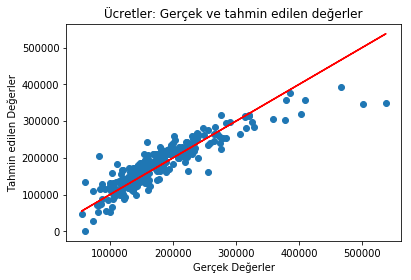

In [23]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ücretler: Gerçek ve tahmin edilen değerler")
plt.show()
